In [1]:
from platform import python_version
python_version()

'3.7.12'

In [2]:
!which python #conda environment: mlp

/Users/ludo/opt/anaconda3/envs/mlp/bin/python


In [3]:
from newsapi import NewsApiClient
import datetime
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

def standard_plot(w=10,h=4,fontsize=14):
    fig = plt.figure(figsize=(w,h))
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'font.size': fontsize})
    plt.rcParams['font.family'] = 'DejaVu Sans'
    #plt.rc('text', usetex=True)
    return plt.gca()

# NewsAPI

In [8]:
# Create a NewsAPI client
client = NewsApiClient(api_key='44f458484d714ccaa616e4c042d91218')

In [9]:
# Fetch the latest news articles from the BBC

# Set the date range for the news articles (last month)
today = datetime.datetime.today()
last_month = today - datetime.timedelta(days=30)

# Fetch all Tesla news from the last month
articles = client.get_everything(q='Tesla',
                                 from_param=last_month.strftime('%Y-%m-%d'),
                                 to=today.strftime('%Y-%m-%d'))

# Print the title and description of each article
for article in articles['articles']:
    print(article['title'])
    print(article['description'])
    print()

Tesla’s latest update adds Steam games and Apple Music
Tesla’s new “Holiday Update” adds a few long-awaited new features, including the ability to play games from Steam in your car and support for Apple Music. There are also improvements to the light show mode.

Tesla accused of illegally firing two employees after they criticized Elon Musk
Two former Tesla employees say they were illegally fired after signing a letter criticizing Elon Musk. The letters addressed Tesla’s return-to-office policy and Musk’s tweets that the employees say violated Tesla’s anti-harassment policies.

Elon Musk isn’t serious about giving power to a new CEO
Elon Musk says that he’ll still be in charge of Twitter’s software and server teams after he resigns his CEO seat to “someone foolish enough” to take the job. In a recent poll, Twitter users voted in favor of him stepping down.

The EV revolution became an eventuality in 2022
It’s been a decade since the first Tesla EV made its commercial debut and the elec

In [10]:
# Create a list of dictionaries, where each dictionary represents an article
articles_list = []
for article in articles['articles']:
    articles_list.append({
        'title': article['title'],
        'author': article['author'],
        'description': article['description'],
        'url': article['url'],
        'publishedAt': article['publishedAt'],
        'source': article['source']['name'],
        'content': article['content']
    })

# Create a Pandas dataframe from the list of dictionaries
df = pd.DataFrame(articles_list)
df.head(n=2)

,title,author,description,url,publishedAt,source,content
0,Tesla’s latest update adds Steam games and App...,Jay Peters,Tesla’s new “Holiday Update” adds a few long-a...,https://www.theverge.com/2022/12/13/23508269/t...,2022-12-14T01:07:20Z,The Verge,The Steam Beta in a Tesla. | Image: Tesla\r\n\...
1,Tesla accused of illegally firing two employee...,Andrew J. Hawkins,Two former Tesla employees say they were illeg...,https://www.theverge.com/2022/12/19/23516889/t...,2022-12-19T17:01:18Z,The Verge,Tesla accused of illegally firing two employee...


In [11]:
print(df.iloc[0].description)

Tesla’s new “Holiday Update” adds a few long-awaited new features, including the ability to play games from Steam in your car and support for Apple Music. There are also improvements to the light show mode.


# News Sentiment
https://arxiv.org/pdf/1801.07055.pdf \
In this data set, the process to obtain these sentiment scores was carried out by
applying the framework of the qdap R package [20] with default parametrization.

data/Facebook_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,...,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,...,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,7,7,7,7,7,7,7,7,7
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,34,34,34,34,34,34,34,34,34


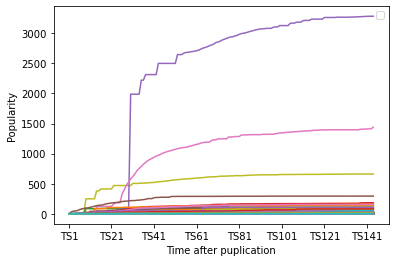

data/GooglePlus_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,23,23,23,23,23,23,23,23,23,23
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


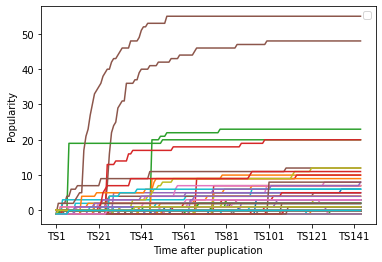

data/LinkedIn_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,10,10,10,10,10,10,10,10,10,10
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


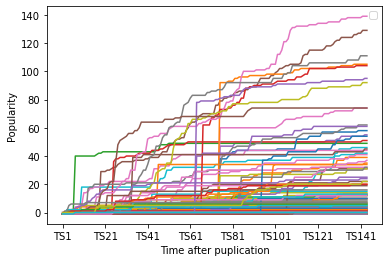

In [4]:
# Probably don't need this data!!!

df_v = {}

for social_media_response in ["data/Facebook_Economy.csv",
                              "data/GooglePlus_Economy.csv",
                              "data/LinkedIn_Economy.csv"]:
    
    # Extract
    df = pd.read_csv(social_media_response)
    
    # Print
    print(social_media_response+':')
    display(df.iloc[:5,:])
    print()  # Add a blank line after each dataframe
    
    # Save
    df_v[social_media_response] = df
    
    # Plotting
    how_many = 200

    #Splice
    df = df.iloc[:how_many, :]

    # Transpose the dataframe and plot the resulting columns
    ax = df.iloc[:how_many, 1:].T.plot(kind='line')
    ax.legend([])
    ax.set_ylabel('Popularity')
    ax.set_xlabel('Time after puplication')

    # Show the plot
    plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the news data
df = pd.read_csv("data/News_Final.csv")

# Only use economy news
news = df[df['Topic'] == 'economy']
news = news.reset_index(drop=True)

# Drop columns we don't need 
news = news.drop(columns='Topic')
news = news.drop(columns='PublishDate')
news = news.drop(columns='Facebook')
news = news.drop(columns='GooglePlus')
news = news.drop(columns='LinkedIn')

news.head(n=20)

,IDLink,Title,Headline,Source,SentimentTitle,SentimentHeadline
0,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,0.208333,-0.156386
1,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,-0.425210,0.139754
2,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,0.000000,0.026064
3,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,0.000000,0.141084
4,27838.0,Greek economy grows 0.1 pct q/q in fourth quarter,Greece's economy expanded by 0.1 percent in la...,Reuters via Yahoo! Finance,0.000000,-0.375259
5,27811.0,Big data and the Internet of Things to add £32...,Big data analytics and the Internet of Things ...,Information Age,0.063205,0.038986
6,27826.0,Greek economy shrank 0.3 percent last year but...,Greece's economy expanded slightly in the last...,Reuters via Yahoo! Finance,-0.085645,-0.099531
7,27839.0,Sweden's economy is on fire — but here's why t...,"Sweden's economy is on a massive tear, but for...",Business Insider UK Finance via Yahoo Canada F...,0.000000,-0.014174
8,27837.0,Greek economy shrank 0.3 percent last year but...,By George Georgiopoulos ATHENS (Reuters) - Gre...,Reuters via Yahoo! Finance,-0.085645,-0.120476
9,27853.0,China cuts reserve requirements in bid to boos...,China's central bank on Monday cut the proport...,AFP via Yahoo! India News,0.291667,0.094658


33928


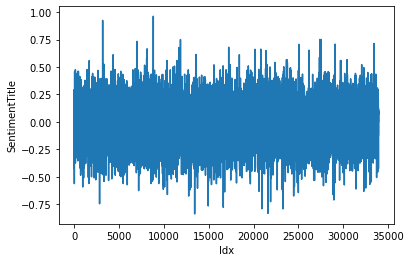

In [6]:
print(len(news['SentimentTitle']))
news['SentimentTitle'].plot()
plt.ylabel('SentimentTitle')
plt.xlabel('Idx')
plt.show()

In [7]:
# Find the maximum value and corresponding index 
max_value = news['SentimentTitle'].max()
max_index = news['SentimentTitle'].idxmax()

# Find the minimum value and corresponding index 
min_value = news['SentimentTitle'].min()
min_index = news['SentimentTitle'].idxmin()

# Print the results
print("Maximum value:", max_value)
print(news.iloc[max_index,:].Title)
print('Headline score:',news['SentimentHeadline'][max_index])
print(news.iloc[max_index,:].Headline)


print("\nMinimum value:", min_value)
print(news.iloc[min_index,:].Title)
print('Headline score:',news['SentimentHeadline'][min_index])
print(news.iloc[min_index,:].Headline)

Maximum value: 0.962353560852284
We just got some really great news about the economy
Headline score: -0.0108601257321392
The US economy created new jobs at an unexpectedly strong pace in December. There was a net increase of 292,000 jobs in the month,

Minimum value: -0.838525491562421
Improving economy not helping all
Headline score: -0.234129611399034
"""What's important to metro area economies is not just jobs,""" said Richard Shearer, a senior research analyst at the Brookings Institution.


# Use a RNN to map headlines to sentiment score

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [9]:
# Select the 'Title' column
titles = news['Title']
labels = news['SentimentTitle']

# Convert the column to a list
titles = titles.tolist()
labels = labels.tolist()

# Print the list
training_length = len(titles)
print(training_length)
print(len(labels))

33928
33928


In [20]:
# Tokenize the news headlines
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)

# Pad the sequences to the same length
max_length = max([len(seq) for seq in sequences])
print(max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

25


In [12]:
# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1  # +1 to account for 0 padding
print(vocab_size)  # Outputs the number of unique tokens in the data

19569


In [17]:
"""
# Load in embeddings
glove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)

# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vectors.shape[1]))

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
"""

"\n# Load in embeddings\nglove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'\nglove = np.loadtxt(glove_vectors, dtype='str', comments=None)\n\n# Extract the vectors and words\nvectors = glove[:, 1:].astype('float')\nwords = glove[:, 0]\n\n# Create lookup of words to vectors\nword_lookup = {word: vector for word, vector in zip(words, vectors)}\n\n# New matrix to hold word embeddings\nembedding_matrix = np.zeros((num_words, vectors.shape[1]))\n\nfor i, word in enumerate(word_idx.keys()):\n    # Look up the word embedding\n    vector = word_lookup.get(word, None)\n\n    # Record in matrix\n    if vector is not None:\n        embedding_matrix[i + 1, :] = vector\n"

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=vocab_size,
              input_length=max_length,
              output_dim=100,
              #weights=[embedding_matrix],
              trainable=True,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(
    optimizer='adam', loss='mse', metrics=['accuracy'])

In [14]:
padded_sequences = np.array(padded_sequences)
labels = np.array(labels)

In [19]:
print(np.shape(padded_sequences))
print(np.shape(labels))

(33928, 25)
(33928,)


In [39]:
# Train the model
model.fit(padded_sequences, labels, epochs=10, batch_size=128)

Train on 33928 samples
Epoch 1/10
33928/33928 [==============================] - 38s 1ms/sample - loss: 0.0083 - accuracy: 0.1991
Epoch 2/10
33928/33928 [==============================] - 37s 1ms/sample - loss: 0.0052 - accuracy: 0.1991
Epoch 3/10
33928/33928 [==============================] - 41s 1ms/sample - loss: 0.0041 - accuracy: 0.1991
Epoch 4/10
33928/33928 [==============================] - 43s 1ms/sample - loss: 0.0035 - accuracy: 0.1991
Epoch 5/10
33928/33928 [==============================] - 51s 1ms/sample - loss: 0.0031 - accuracy: 0.1991
Epoch 6/10
33928/33928 [==============================] - 53s 2ms/sample - loss: 0.0028 - accuracy: 0.1991
Epoch 7/10
33928/33928 [==============================] - 53s 2ms/sample - loss: 0.0025 - accuracy: 0.1991
Epoch 8/10
33928/33928 [==============================] - 48s 1ms/sample - loss: 0.0023 - accuracy: 0.1991
Epoch 9/10
33928/33928 [==============================] - 51s 2ms/sample - loss: 0.0021 - accuracy: 0.1991
Epoch 10/10
33

In [50]:
y_pred = model.predict(padded_sequences[:100])
print(y_pred[:100])
print(labels[:100])

[[ 2.11236194e-01]
 [-4.62383181e-01]
 [ 2.92914789e-02]
 [ 1.32516939e-02]
 [-5.07770106e-04]
 [ 1.52313355e-02]
 [-7.94811621e-02]
 [-8.97265505e-03]
 [-7.94811621e-02]
 [ 2.87950993e-01]
 [ 2.87950993e-01]
 [ 2.97499215e-03]
 [ 2.97499215e-03]
 [ 2.97499215e-03]
 [ 6.29568473e-02]
 [ 2.87950993e-01]
 [-4.24946174e-02]
 [-9.80084985e-02]
 [-9.80084985e-02]
 [-5.20002425e-01]
 [ 3.16810189e-03]
 [ 3.16810189e-03]
 [ 3.16810189e-03]
 [-1.28754944e-01]
 [-1.28754944e-01]
 [ 1.28709406e-01]
 [ 1.44049481e-01]
 [ 1.36534080e-01]
 [ 1.36534080e-01]
 [ 3.71978395e-02]
 [ 2.50117090e-02]
 [ 3.96252284e-03]
 [-1.47319641e-02]
 [-1.44140363e-01]
 [-5.95478481e-03]
 [-5.95478481e-03]
 [-4.75759339e-03]
 [ 2.21446138e-02]
 [ 2.21446138e-02]
 [ 1.76578928e-02]
 [ 2.21446138e-02]
 [ 1.82444945e-01]
 [ 6.35205731e-02]
 [-7.49222487e-02]
 [ 2.07748804e-02]
 [ 4.11283784e-02]
 [ 9.45750624e-03]
 [ 4.51136902e-02]
 [-2.48760924e-01]
 [ 1.83244236e-02]
 [ 3.05648167e-02]
 [ 8.38624462e-02]
 [ 2.7190187

In [52]:
def count_positives(numbers):
    count = 0
    for number in numbers:
        if number > 0:
            count += 1
    return count

print(count_positives(y_pred))
print(count_positives(labels[:100]))

56
37


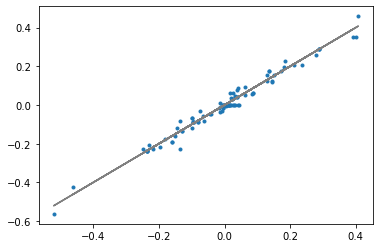

In [54]:
plt.plot(y_pred,labels[:100],'.')
plt.plot(y_pred,y_pred,'-',c='grey')

# Test the trained network:

In [ ]:
# Input
titles = [a['title'] for a in articles['articles']]